In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sqlalchemy import create_engine
from pandasql import sqldf
import sqlite3

In [3]:
retail = pd.read_csv('marketing_Campaign_date_fix.csv')
retail.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,0,0,3,11,1,67
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,0,0,3,11,0,70
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,0,3,11,0,59
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,0,0,3,11,0,40
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,0,3,11,0,43


In [5]:
retail.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,55.194196
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,11.984069
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,28.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,47.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,54.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,65.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,131.000000


In [7]:
retail.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
dtype: int64

## CUSTOMER DEMOGRAPHIC INFO:

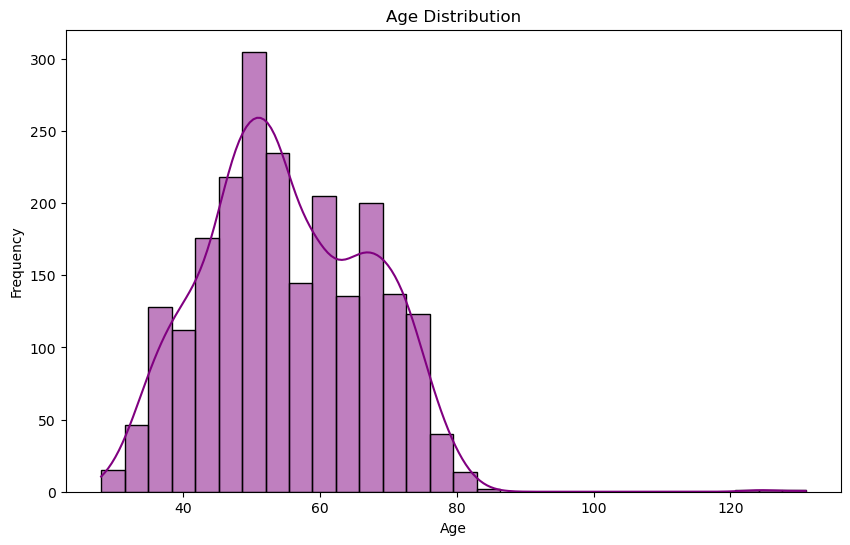

In [9]:
# distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(retail['Age'], bins=30, kde=True, color= 'purple')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

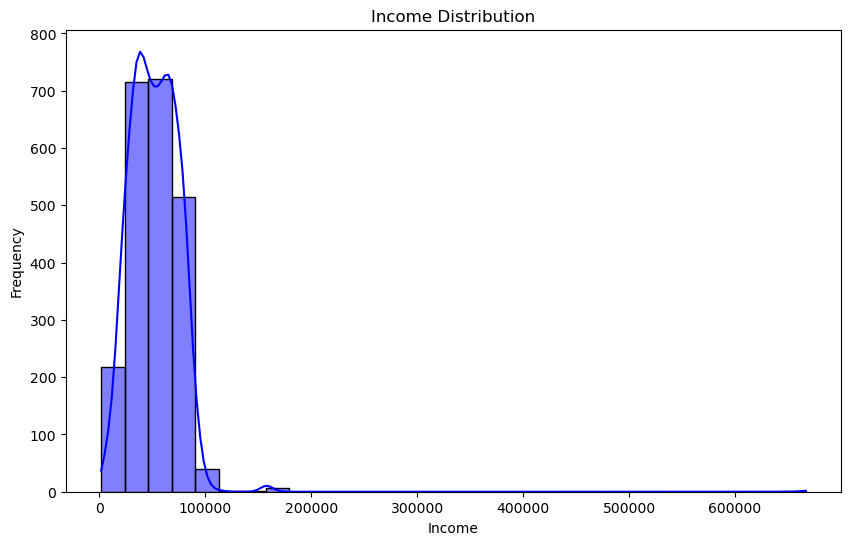

In [11]:
#distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(retail['Income'].dropna(), bins=30, kde=True, color = 'blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

## Purchasing Patterns:

In [13]:
# total amount spent by each customer
retail['Total_Amount'] = retail['MntWines'] + retail['MntFruits'] + retail['MntMeatProducts'] + retail['MntFishProducts'] + retail['MntSweetProducts'] + retail['MntGoldProds']
retail

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Amount
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,0,3,11,1,67,1617
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,0,3,11,0,70,27
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,0,3,11,0,59,776
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,0,3,11,0,40,53
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,0,3,11,0,43,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,...,0,0,0,0,0,3,11,0,57,1341
2236,4001,1946,PhD,Together,64014.0,2,1,6/10/2014,56,406,...,0,0,1,0,0,3,11,0,78,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,...,1,0,0,0,0,3,11,0,43,1241
2238,8235,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,...,0,0,0,0,0,3,11,0,68,843


In [15]:
retail['Total_Amount'].sum()

1356988

In [19]:
# total number of purchases per customer
retail['Total_Purchases'] = retail['NumDealsPurchases'] + retail['NumWebPurchases'] + retail['NumCatalogPurchases'] + retail['NumStorePurchases']
retail

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Amount,Total_Purchases
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,0,3,11,1,67,1617,25
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,0,3,11,0,70,27,6
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,0,3,11,0,59,776,21
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,0,3,11,0,40,53,8
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,0,3,11,0,43,422,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,6/13/2013,46,709,...,0,0,0,0,3,11,0,57,1341,18
2236,4001,1946,PhD,Together,64014.0,2,1,6/10/2014,56,406,...,0,1,0,0,3,11,0,78,444,22
2237,7270,1981,Graduation,Divorced,56981.0,0,0,1/25/2014,91,908,...,0,0,0,0,3,11,0,43,1241,19
2238,8235,1956,Master,Together,69245.0,0,1,1/24/2014,8,428,...,0,0,0,0,3,11,0,68,843,23


In [21]:
retail['Total_Purchases'].sum()

33291

In [ ]:
#Summary statistics for purchases history and product categories

In [23]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [25]:
purchase_cols = ['Total_Amount', 'Total_Purchases', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Recency']
retail[purchase_cols].describe()



,Total_Amount,Total_Purchases,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Recency
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,605.798214,14.862054,2.325000,4.084821,2.662054,5.790179,49.109375
std,602.249288,7.677173,1.932238,2.778714,2.923101,3.250958,28.962453
min,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,68.750000,8.000000,1.000000,2.000000,0.000000,3.000000,24.000000
50%,396.000000,15.000000,2.000000,4.000000,2.000000,5.000000,49.000000
75%,1045.500000,21.000000,3.000000,6.000000,4.000000,8.000000,74.000000
max,2525.000000,44.000000,15.000000,27.000000,28.000000,13.000000,99.000000


In [27]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
retail[product_cols].describe()


                

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875
std,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000
max,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


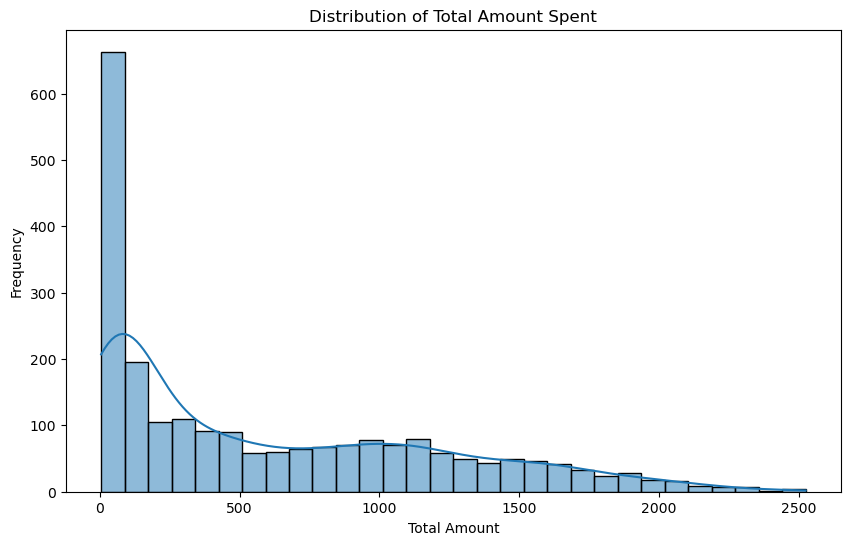

In [29]:
# distribution of total amount spent
plt.figure(figsize=(10, 6))
sns.histplot(retail['Total_Amount'], bins=30, kde=True)
plt.title('Distribution of Total Amount Spent')
plt.xlabel('Total Amount')
plt.ylabel('Frequency')
plt.show()

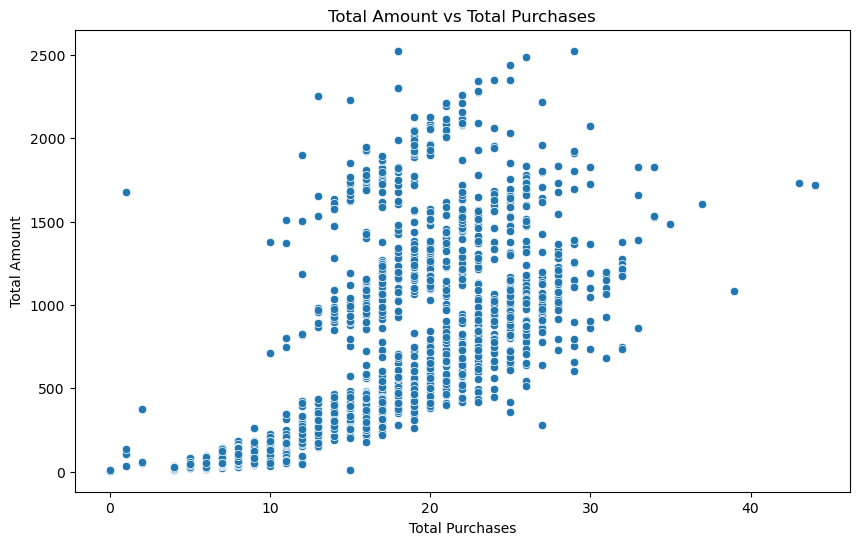

In [31]:
# relationship between total amount spent and total purchases
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total_Purchases', y='Total_Amount', data=retail)
plt.title('Total Amount vs Total Purchases')
plt.xlabel('Total Purchases')
plt.ylabel('Total Amount')
plt.show()

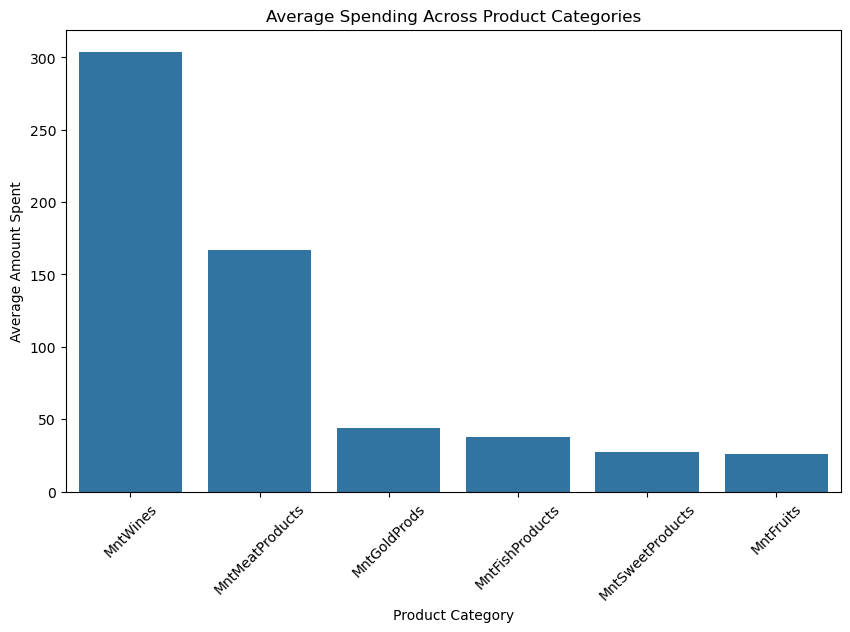

In [33]:
# average spending across different product categories
product_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
avg_spending = retail[product_categories].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_spending.index, y=avg_spending.values)
plt.title('Average Spending Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Average Amount Spent')
plt.xticks(rotation=45)
plt.show()


## Marketing Campaign Analysis: 

In [39]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
total_accepted = retail[campaigns].sum().sort_values(ascending = False)
total_accepted = pd.DataFrame(total_accepted)
total_accepted

,0
Response,334
AcceptedCmp4,167
AcceptedCmp3,163
AcceptedCmp5,163
AcceptedCmp1,144
AcceptedCmp2,30


In [41]:
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
retail['TotalResponses'] = retail[campaigns].sum(axis=1)

In [43]:
retail.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Total_Amount,Total_Purchases,TotalResponses
0,5524,1957,Graduation,Single,58138.0,0,0,9/4/2012,58,635,...,0,0,0,3,11,1,67,1617,25,1
1,2174,1954,Graduation,Single,46344.0,1,1,3/8/2014,38,11,...,0,0,0,3,11,0,70,27,6,0
2,4141,1965,Graduation,Together,71613.0,0,0,8/21/2013,26,426,...,0,0,0,3,11,0,59,776,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,2/10/2014,26,11,...,0,0,0,3,11,0,40,53,8,0
4,5324,1981,PhD,Married,58293.0,1,0,1/19/2014,94,173,...,0,0,0,3,11,0,43,422,19,0


In [45]:
retail['TotalResponses'].describe()

count    2240.000000
mean        0.446875
std         0.890543
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         5.000000
Name: TotalResponses, dtype: float64

In [47]:
# of the 2240 customers, how many customers responded to a campaign

customers = retail.loc[(retail['AcceptedCmp1'] == 1) | (retail['AcceptedCmp2'] == 1) | (retail['AcceptedCmp3'] == 1)  | (retail['AcceptedCmp4'] == 1) | (retail['AcceptedCmp5'] == 1) | (retail['Response'] == 1)]
customers

len(customers.index)

609

In [49]:
# total number of customers

total_num_customers = retail['ID'].count()
total_num_customers


2240

In [51]:
# total number of accepted offers

total_offers = total_accepted.sum()
total_offers

0    1001
dtype: int64

In [53]:
#number of times a customer accepted/responded to a campaign

response_counts = retail['TotalResponses'].value_counts().sort_index()
response_counts

TotalResponses
0    1631
1     370
2     142
3      51
4      36
5      10
Name: count, dtype: int64

In [65]:
# Calculate the percentage of customers who responded to at least one campaign
responded_customers = (retail['TotalResponses'] > 0).sum()
total_customers = len(retail)
response_rate = (responded_customers / total_customers) * 100

print(total_customers)
print(responded_customers)
print(response_rate)

2240
609
27.187499999999996


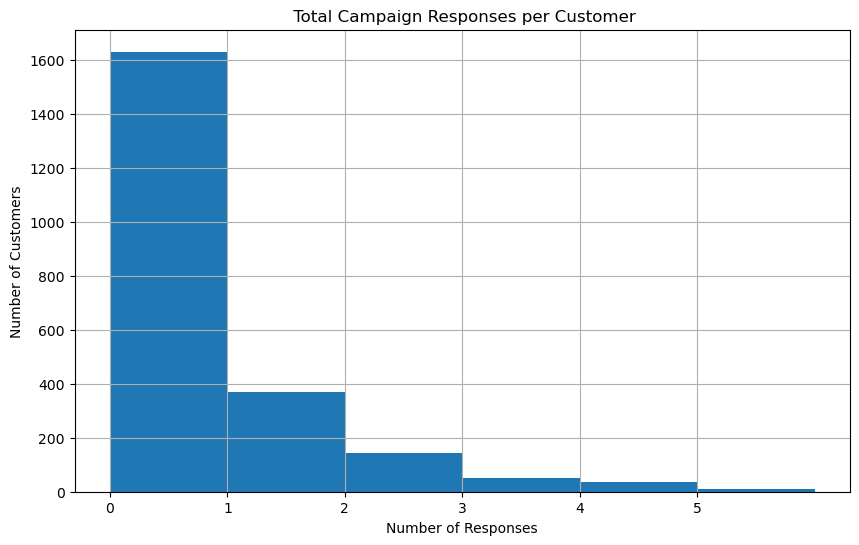

In [57]:
plt.figure(figsize=(10, 6))
retail['TotalResponses'].hist(bins=range(0, retail['TotalResponses'].max() + 2, 1))
plt.title(' Total Campaign Responses per Customer')
plt.xlabel('Number of Responses')
plt.ylabel('Number of Customers')
plt.xticks(range(0, retail['TotalResponses'].max() + 1))
plt.show()